In [13]:
# Import dependencies
import torch 
from PIL import Image
from torch import load
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from ImageClassifier import ImageClassifier
import os
from matplotlib import pyplot as plt

# Hyperparameters
epochs = 10
learning_rate = 0.001
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
# Instance of the neural network
model = ImageClassifier().to(device)

# Load the existing model weights
with open('model_state.pt', 'rb') as f: 
        model.load_state_dict(load(f))  

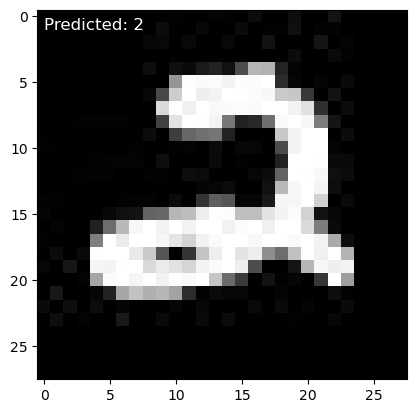

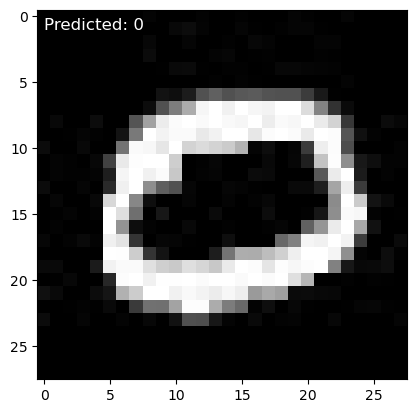

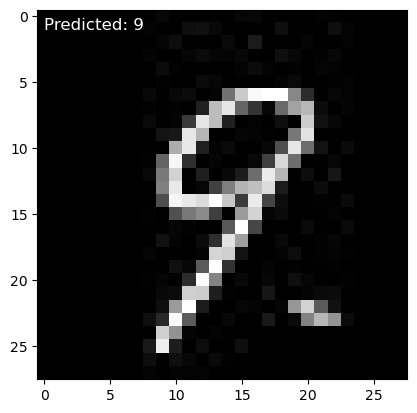

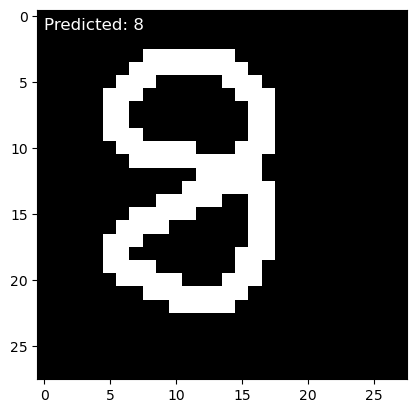

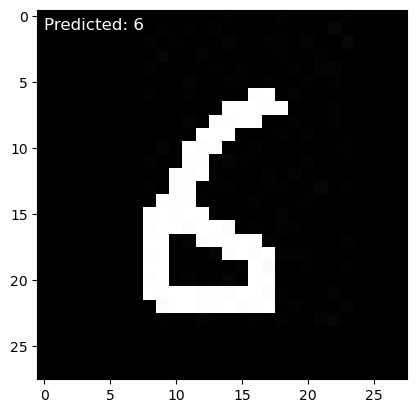

In [39]:
# Output the images and the predicted classes
for name in os.listdir('test_images'):
    img = Image.open('test_images/' + name).convert('L') 
    
    # Preprocess the image
    img_tensor = ToTensor()(img).unsqueeze(0).to(device)
    
    prediction = torch.argmax(model(img_tensor))

    # Display the image and the predicted class
    fig, sp = plt.subplots(1)
    sp.imshow(img, cmap='gray')
    sp.text(0, 1, f"Predicted: {prediction.item()}", color='white', fontsize=12)
    plt.show()
    